In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retention/Retention Case study - Data.csv


In [2]:
x=pd.read_csv("/kaggle/input/retention/Retention Case study - Data.csv")

In [3]:
x=pd.DataFrame(x)

x

,Billing_Date,Sale_ID,USER_CODE,Amount,Qty,Margin,Gender,Age,Registration_Date,Rating,Payment_mode
0,43831,3543119,964361,"$ 3,552",1,$ 177.60,F,21,41950,4,Cash
1,43831,3543120,983421,"$ 15,000",2,"$ 1,500.00",M,60,42841,5,Card
2,43831,3543121,986649,$ 500,1,$ 50.00,M,45,43017,5,Card
3,43831,3543122,1017395,"$ 6,237",1,$ 623.70,F,63,41886,4,Online
4,43831,3543123,1033071,"$ 20,000",1,"$ 4,000.00",F,26,42737,3,Cash
...,...,...,...,...,...,...,...,...,...,...,...
230322,43890,3773441,57538092,$ 500,1,$ 100.00,F,57,42697,5,Cash
230323,43890,3773442,57540968,$ 200,1,$ 30.00,M,23,43052,5,Card
230324,43890,3773443,57545498,"$ 1,192",1,$ 238.39,M,57,43248,4,Online
230325,43890,3773444,57546882,$ 200,1,$ 30.00,F,48,41260,3,Cash


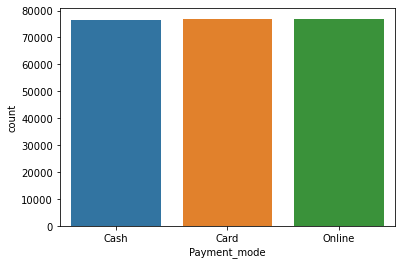

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#count of mode of payment over 2 months
sns.countplot("Payment_mode",data=x)

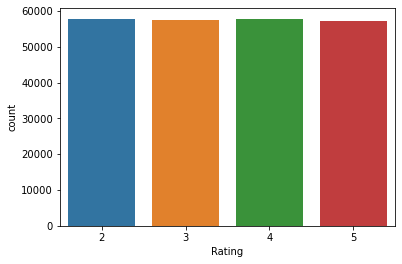

In [5]:
#count of rating
sns.countplot("Rating",data=x)

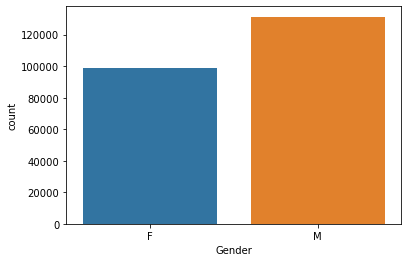

In [6]:
#count of gender
sns.countplot("Gender",data=x)

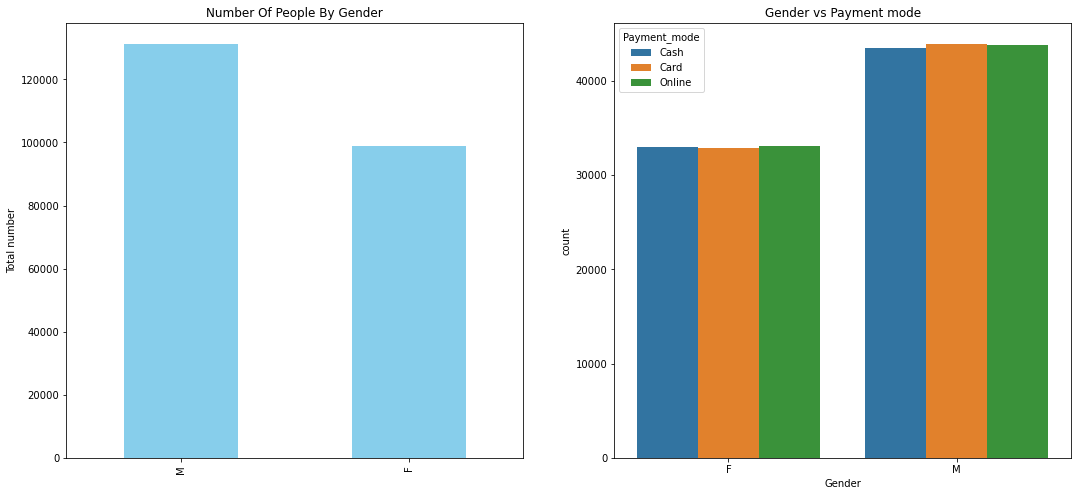

In [7]:
#no of male and female prefering particular mode of payment

fig, ax = plt.subplots(1, 2, figsize = (18, 8))
x["Gender"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of People By Gender")
ax[0].set_ylabel("Total number")
sns.countplot("Gender", hue = "Payment_mode", data=x, ax = ax[1])
ax[1].set_title("Gender vs Payment mode")
plt.show()

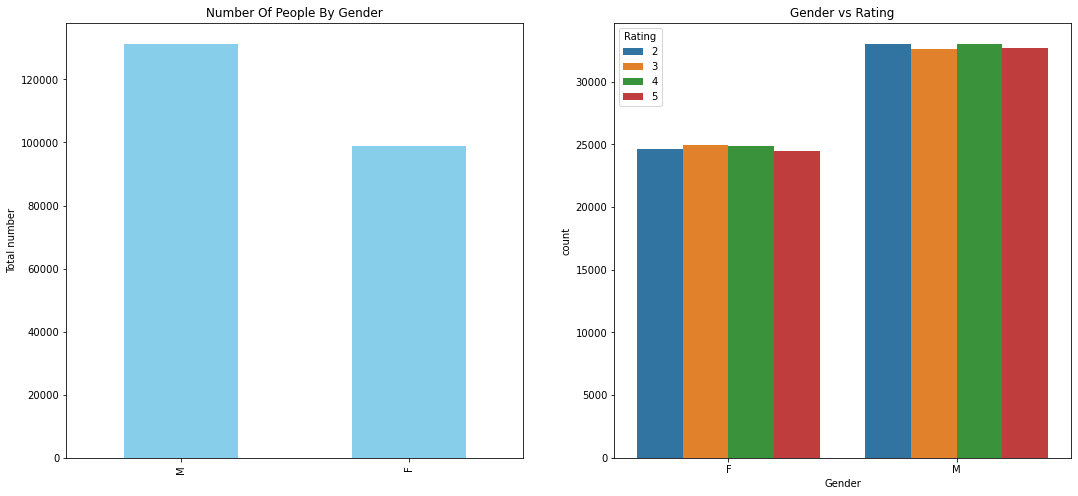

In [8]:
#no of male and female giving particular rating

fig, ax = plt.subplots(1, 2, figsize = (18, 8))
x["Gender"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of People By Gender")
ax[0].set_ylabel("Total number")
sns.countplot("Gender", hue = "Rating", data=x, ax = ax[1])
ax[1].set_title("Gender vs Rating")
plt.show()

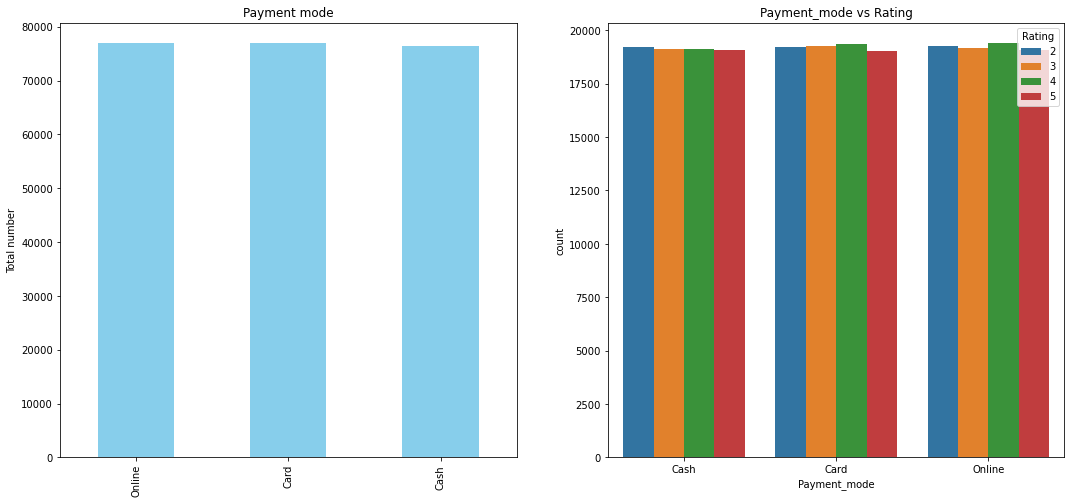

In [9]:
#no of particular rating by patrcular mode of payment

fig, ax = plt.subplots(1, 2, figsize = (18, 8))
x["Payment_mode"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Payment mode")
ax[0].set_ylabel("Total number")
sns.countplot("Payment_mode", hue = "Rating", data=x, ax = ax[1])
ax[1].set_title("Payment_mode vs Rating")
plt.show()

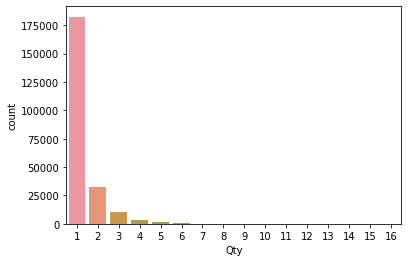

In [10]:
sns.countplot("Qty",data=x)

In [27]:
y=x.drop(['Sale_ID','USER_CODE','Qty','Gender','Age','Registration_Date','Rating','Payment_mode'], axis=1)

In [28]:

y[' Amount '] = [x.strip(' $ ') for x in y[' Amount ']]
y[' Margin '] = [x.strip(' $ ') for x in y[' Margin ']]
y


,Billing_Date,Amount,Margin
0,43831,"3,552",177.60
1,43831,"15,000","1,500.00"
2,43831,500,50.00
3,43831,"6,237",623.70
4,43831,"20,000","4,000.00"
...,...,...,...
230322,43890,500,100.00
230323,43890,200,30.00
230324,43890,"1,192",238.39
230325,43890,200,30.00


In [29]:
y=y.drop([' Amount '], axis=1)

In [30]:

y[' Margin '] = y[' Margin '].str.replace(",","").astype(float)
group=y.groupby(['Billing_Date']).sum()

In [52]:

from statsmodels.tsa.arima_model import ARIMA
train=group[' Margin ']
train=np.array(train)
train


array([1864766.39      , 2402201.41      , 2233325.72      ,
       2465569.94      , 4210229.7       , 2333067.93      ,
       2352544.86      , 2725521.72      , 2562240.87      ,
       5346363.13000001, 2052012.24      , 3418625.12      ,
       1867911.93      , 1945736.15      , 3664561.84      ,
       2180454.2       , 2206829.28      , 2121304.08      ,
       2290255.89      , 5231022.92      , 2209781.1       ,
       2406130.17      , 2329292.63      , 2145472.67      ,
       2233726.13      , 4414093.56      , 2552730.87      ,
       2550586.13      , 2606296.62      , 2499418.44      ,
        377628.91      , 5457069.9       , 2266791.24      ,
       2440296.39      , 2470246.42      , 2569874.24      ,
       2271933.24      ,  198843.74      , 3545550.62      ,
       2338669.92      , 2387774.        , 2301463.43      ,
       2090991.01      ,  197064.47      ,  202889.25      ,
       4911891.81      , 2052283.29      , 2331725.32      ,
       2159461.92      ,

In [46]:
model = ARIMA(train, order=(5,1,0))

In [47]:
model_fit = model.fit(disp=0)

In [53]:
predictions = list()
for t in range(25):
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    

In [61]:
predictions

array(74931905.0674368)

In [58]:
total_expected_revenue=np.sum(predictions)

In [59]:
total_expected_revenue

74931905.0674368